## Premier League Match Prediction - Data Preprocessing and Exploratory Data Analysis
### CPSC322 Final Project
Author: Arjuna Herbst | Date: 11/10/2024 | Gonzaga University

---

This notebook covers data preprocessing, exploratory data analysis (EDA), and visualizations for predicting Premier League match outcomes. We will explore the dataset to understand its structure, clean it as necessary, and visualize trends that may help inform our classification model.

Let's get started by importing the libraries we will be using for this project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, lets load our dataset that we scraped earlier from [fbref.com](https://fbref.com/) \
This will be done using the pandas library 🐼

In [3]:
data = pd.read_csv('data/premier_league_data2021-24.csv').iloc[: , 1:]
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2023,Manchester City
1,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2023,Manchester City
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2023,Manchester City
3,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2023,Manchester City
4,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2023,Manchester City


Let's view some basic information about our data set, using the ```info()``` and ```describe()``` methods

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2280 non-null   object 
 1   time           2280 non-null   object 
 2   comp           2280 non-null   object 
 3   round          2280 non-null   object 
 4   day            2280 non-null   object 
 5   venue          2280 non-null   object 
 6   result         2280 non-null   object 
 7   gf             2280 non-null   int64  
 8   ga             2280 non-null   int64  
 9   opponent       2280 non-null   object 
 10  xg             2280 non-null   float64
 11  xga            2280 non-null   float64
 12  poss           2280 non-null   float64
 13  attendance     2278 non-null   float64
 14  captain        2280 non-null   object 
 15  formation      2280 non-null   object 
 16  opp formation  2280 non-null   object 
 17  referee        2280 non-null   object 
 18  match re

Looks like we have a column ```notes``` that has 0 non-null instances, let's get rid of that column:

In [ ]:
data = data.drop(columns=["notes"])
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Craig Pawson,Match Report,17.0,8.0,13.9,0.0,0,0,2023,Manchester City
1,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Robert Jones,Match Report,14.0,4.0,17.9,0.0,0,0,2023,Manchester City
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Jarred Gillett,Match Report,29.0,9.0,17.3,2.0,0,1,2023,Manchester City
3,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Michael Oliver,Match Report,6.0,4.0,14.8,0.0,1,1,2023,Manchester City
4,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Andy Madley,Match Report,29.0,13.0,16.4,1.0,0,0,2023,Manchester City


Okay, now lets find some patterns in our data with the seaborn and matplotlib libraries

Here's a plot that shows the count of each type of match result (Win, Draw, Loss)

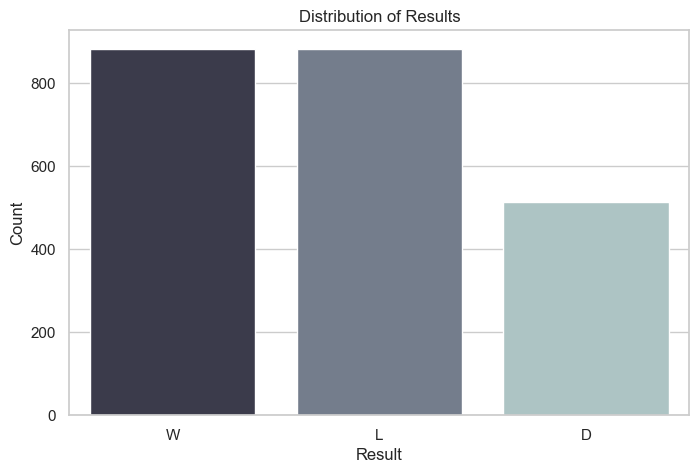

In [16]:
# setting the style for sns plots
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='result', data=data, palette='bone')
plt.title('Distribution of Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


So we have a similar amount of W's and L's, while Draws are less common. This makes sense since draws happen less often than a win or loss in soccer matches. 

Lets look at something I think is pretty cool, the distribution of goal difference across the matches in our data"

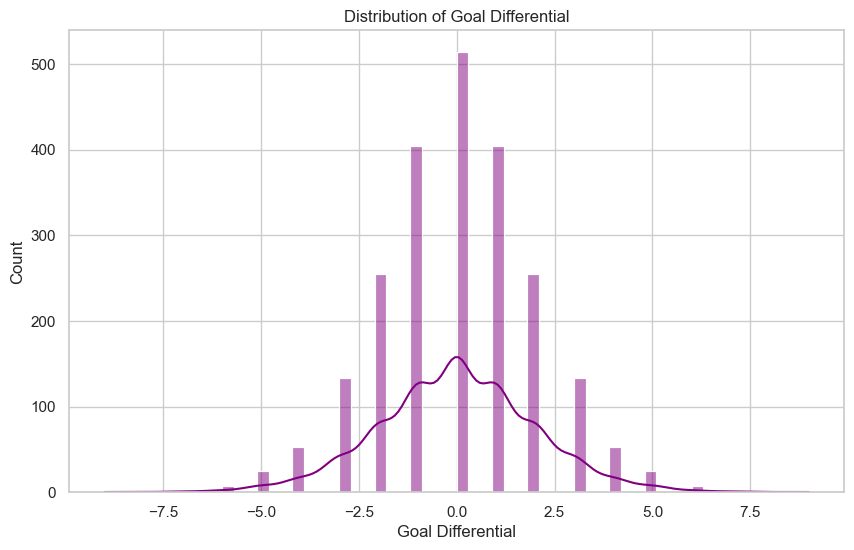

In [17]:
# might as well add this goal differential column to our dataset, it could be useful
data['goal_diff'] = data['gf'] - data['ga']

plt.figure(figsize=(10, 6))
sns.histplot(data['goal_diff'], kde=True, color='purple')
plt.title('Distribution of Goal Differential')
plt.xlabel('Goal Differential')
plt.show()  

The histogram of the **goal difference** (calculated as `goals for - goals against`) reveals a distribution that closely resembles a normal distribution. Most games are clustered around a small goal difference, indicating that teams tend to score a similar number of goals as their opponents in most matches. 

Next, let's plot the **Expected Goals (xG)** against the **Expected Goals Against(xGA)** 

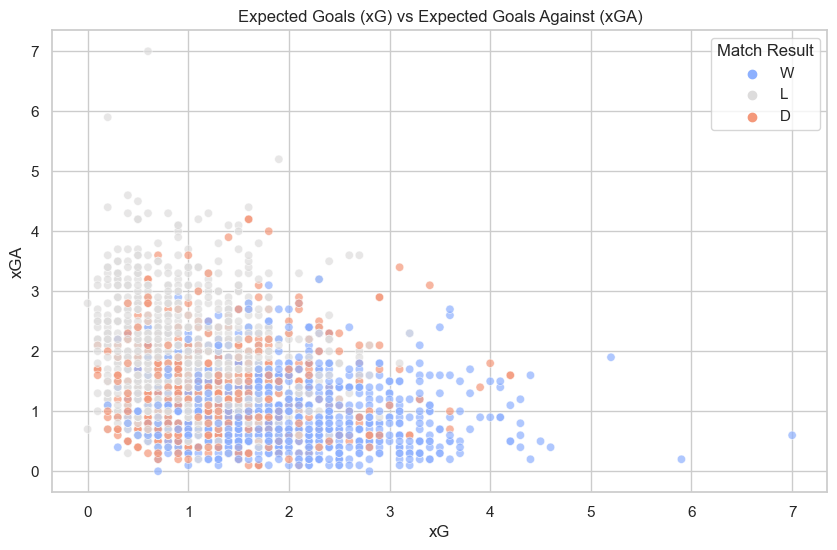

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xg', y='xga', hue='result', data=data, palette='coolwarm', alpha=0.7)
plt.title('Expected Goals (xG) vs Expected Goals Against (xGA)')
plt.xlabel('xG')
plt.ylabel('xGA')
plt.legend(title='Match Result')
plt.show()

In this diagram, we see that **Wins** usually come when a team has more **xG** and less **xGA**, while losses seem to come with less **xGA** & **xG**

Let's look at how a team's possession stat plays into getting wins

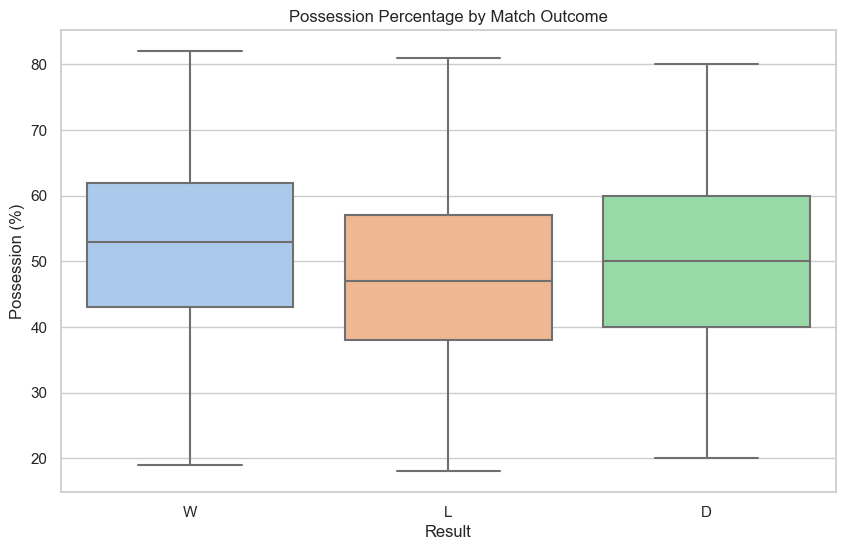

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='poss', data=data, palette='pastel')
plt.title('Possession Percentage by Match Outcome')
plt.xlabel('Result')
plt.ylabel('Possession (%)')
plt.show()

As expected, higher possesion correlates with getting a **Win**. The more you control the ball, the more opportunites you will get to score

Here's the code to look at the attendance distribution for each team in our dataset:

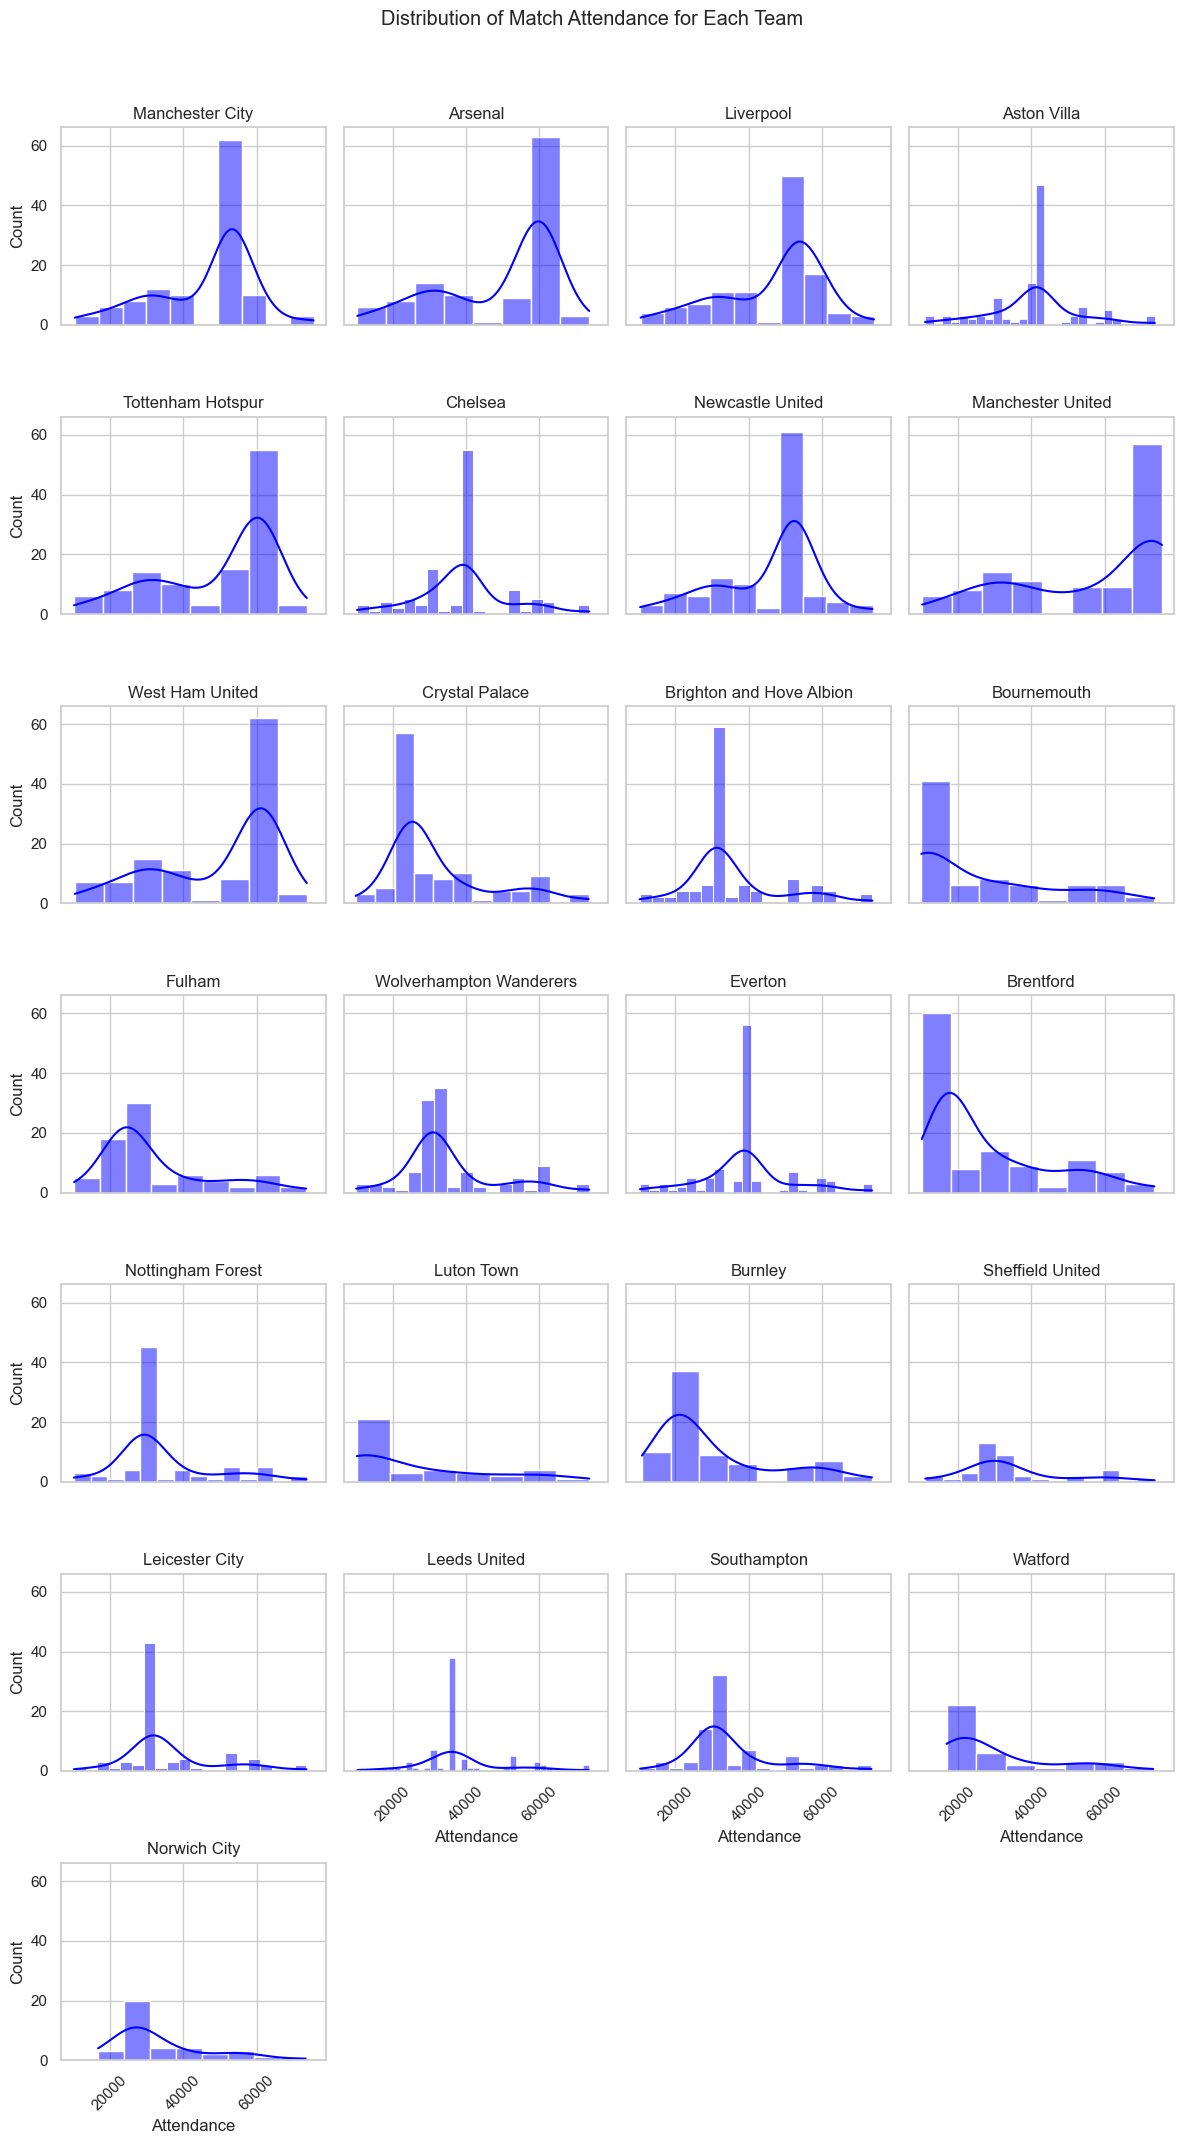

In [ ]:
# Set up a FacetGrid to create a histogram for each team
g = sns.FacetGrid(data, col='team', col_wrap=4, height=3, sharex=True, sharey=True, despine=False)
g.map(sns.histplot, 'attendance', kde=True, color='blue')
g.set_titles("{col_name}")
g.set_axis_labels("Attendance", "Count")
g.fig.suptitle('Distribution of Match Attendance for Each Team', y=1.02)

plt.tight_layout()
plt.show()